In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm,chisquare


In [2]:
popt0_34=1/6.90512457e-09
popt1_34=-1.07549696e-11
popt0_12=1/6.32570033e-09 
popt1_12=-7.72742902e-11

In [3]:
t1_1,t2_1,t3_1,t4_1,a1_1,a2_1,a3_1,a4_1 = np.loadtxt('Position_1.txt',unpack=True)

delta_t_34_1 = (t4_1-t3_1)*1e-7
delta_t_12_1 = (t2_1-t1_1)*1e-7

t1_2,t2_2,t3_2,t4_2,a1_2,a2_2,a3_2,a4_2 = np.loadtxt('Position_2.txt',unpack=True)

delta_t_12_2=(t2_2-t1_2)*1e-7
delta_t_34_2=(t4_2-t3_2)*1e-7


t1_3,t2_3,t3_3,t4_3,a1_3,a2_3,a3_3,a4_3 = np.loadtxt('Position_3.txt',unpack=True)

delta_t_12_3=(t2_3-t1_3)*1e-7
delta_t_34_3=(t4_3-t3_3)*1e-7

In [4]:
x12_1=(popt0_12/2)*(delta_t_12_1-popt1_12)+22
x34_1=(popt0_34/2)*(delta_t_34_1-popt1_34)+22

x12_2=(popt0_12/2)*(delta_t_12_2-popt1_12)+22
x34_2=(popt0_34/2)*(delta_t_34_2-popt1_34)+22

x12_3=(popt0_12/2)*(delta_t_12_3-popt1_12)+22
x34_3=(popt0_34/2)*(delta_t_34_3-popt1_34)+22

In [4]:
mask = (delta_t_12_1 >= -44/(popt0_12)+popt1_12) & (delta_t_12_1 <= 44/(popt0_12)+popt1_12) & (delta_t_34_1>= -44/(popt0_34)+popt1_34) & (delta_t_34_1 <= 44/(popt0_34)+popt1_34)
delta_t_12_1 = delta_t_12_1[mask]
delta_t_34_1 = delta_t_34_1[mask]


print(delta_t_34_1.shape)

print(delta_t_12_1.shape)

(4464,)
(4464,)


In [8]:
mask = (delta_t_12_2 >= -44/(popt0_12)+popt1_12) & (delta_t_12_2 <= 44/(popt0_12)+popt1_12) & (delta_t_34_2>= -44/(popt0_34)+popt1_34) & (delta_t_34_2 <= 44/(popt0_34)+popt1_34)
delta_t_12_2 = delta_t_12_2[mask]
delta_t_34_2 = delta_t_34_2[mask]


print(delta_t_34_2.shape)

print(delta_t_12_2.shape)

(3939,)
(3939,)


In [9]:
mask = (delta_t_12_3 >= -44/(popt0_12)+popt1_12) & (delta_t_12_3 <= 44/(popt0_12)+popt1_12) & (delta_t_34_3>= -44/(popt0_34)+popt1_34) & (delta_t_34_3 <= 44/(popt0_34)+popt1_34)
delta_t_12_3 = delta_t_12_3[mask]
delta_t_34_3 = delta_t_34_3[mask]


print(delta_t_34_3.shape)

print(delta_t_12_3.shape)

(4550,)
(4550,)


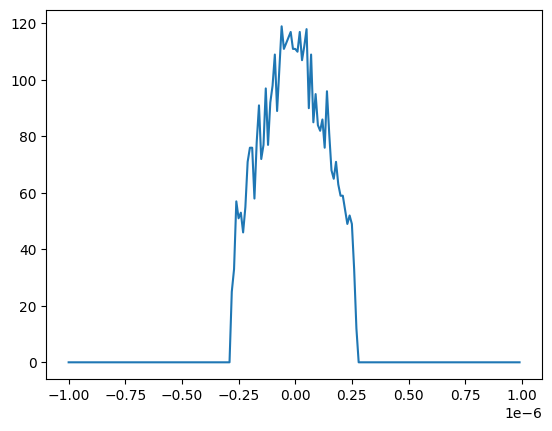

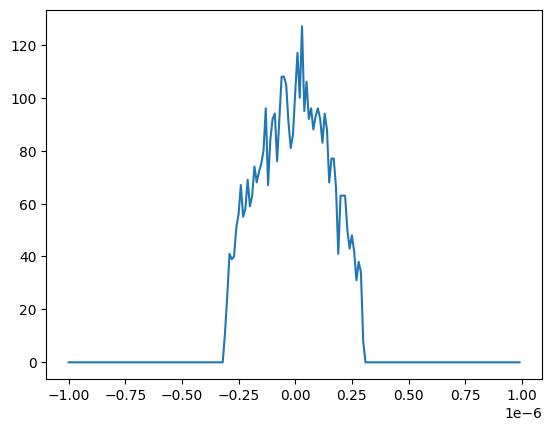

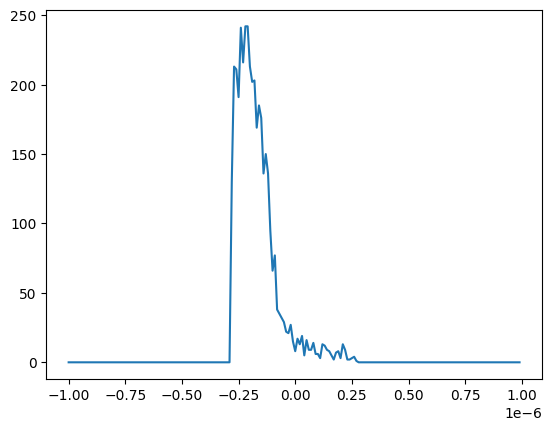

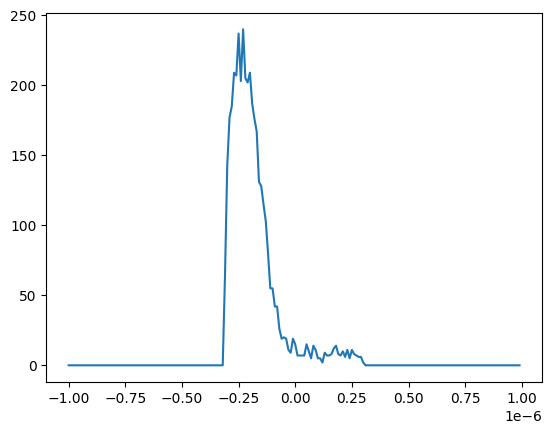

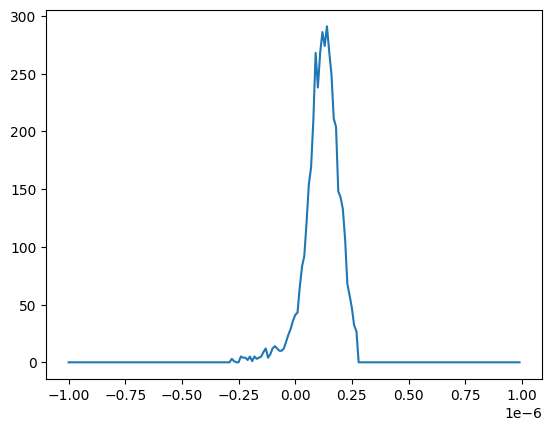

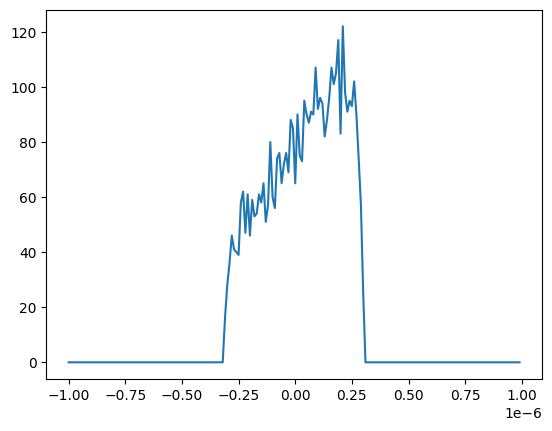

In [10]:
# freq12_1,bins12_1=np.histogram(delta_t_12_1,bins=round(np.sqrt(5000)),range=(-10,10))
freq12_1,bins12_1=np.histogram(delta_t_12_1,bins=200,range=(-10*1e-7,10*1e-7))
plt.plot(bins12_1[:-1],freq12_1)
plt.show()

freq34_1,bins34_1=np.histogram(delta_t_34_1,bins=200,range=(-10*1e-7,10*1e-7))
plt.plot(bins34_1[:-1],freq34_1)
plt.show()


freq12_2,bins12_2=np.histogram(delta_t_12_2,bins=200,range=(-10*1e-7,10*1e-7))
plt.plot(bins12_2[:-1],freq12_2)
plt.show()

freq34_2,bins34_2=np.histogram(delta_t_34_2,bins=200,range=(-10*1e-7,10*1e-7))
plt.plot(bins34_2[:-1],freq34_2)
plt.show()

freq12_3,bins12_3=np.histogram(delta_t_12_3,bins=200,range=(-10*1e-7,10*1e-7))
plt.plot(bins12_3[:-1],freq12_3)
plt.show()

freq34_3,bins34_3=np.histogram(delta_t_34_3,bins=200,range=(-10*1e-7,10*1e-7))
plt.plot(bins34_3[:-1],freq34_3)
plt.show()




(6, 200)
Fitted parameters: [ 22.31781007 -80.51110958   0.3318    ]
Covariance matrix: [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
Chisquare: nan
P-value: nan
197
Chisquare reduced: nan


/home/francesco/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_30742/1084717378.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = sum(counts[i,:]) / sum(expected)
/tmp/ipykernel_30742/1084717378.py:58: RuntimeWarning: invalid value encountered in multiply
  expected = expected * ratio


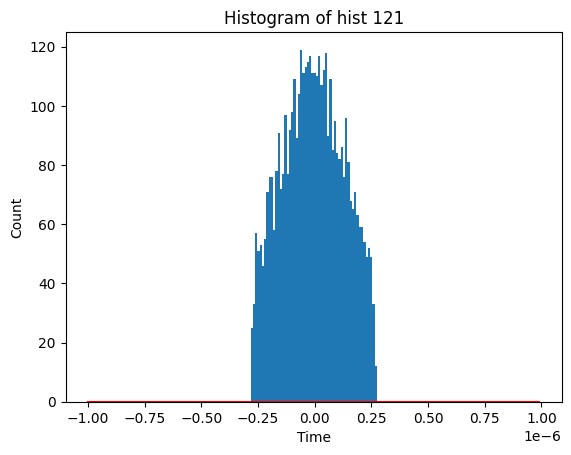

Fitted parameters: [ 2.23167792e+01 -1.53132644e+04  3.03266025e+00]
Covariance matrix: [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
Chisquare: nan
P-value: nan
197
Chisquare reduced: nan


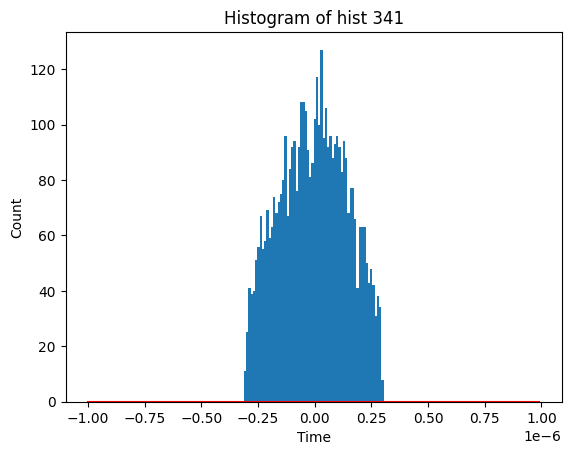

Fitted parameters: [43439.56876956  -421.4266659    151.88377283]
Covariance matrix: [[ 1.12210403e+24 -3.14619799e+20 -1.40365197e+20]
 [-3.14619799e+20  4.02835278e+18 -1.38033171e+18]
 [-1.40365197e+20 -1.38033171e+18  5.29092117e+17]]
Chisquare: 30282.426510924215
P-value: 0.0
197
Chisquare reduced: 153.7179010706813


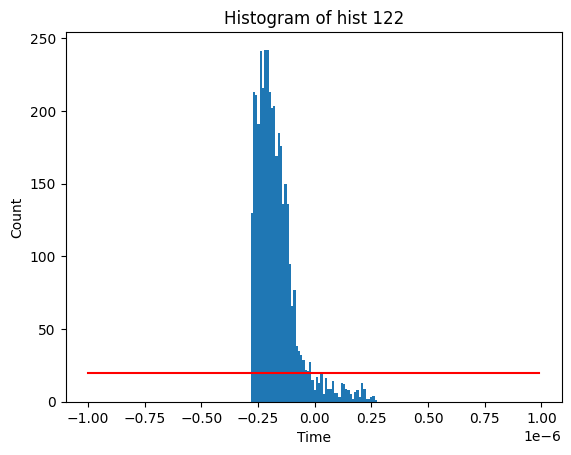

Fitted parameters: [434.69121728  -0.76740977  -0.43626113]
Covariance matrix: [[ 4.86123812e+19 -2.81683155e+16 -8.01415093e+15]
 [-2.81683155e+16  1.63251860e+13  4.64555849e+12]
 [-8.01415093e+15  4.64555849e+12  1.32221088e+12]]
Chisquare: 28053.7849398751
P-value: 0.0
197
Chisquare reduced: 142.40499969479745


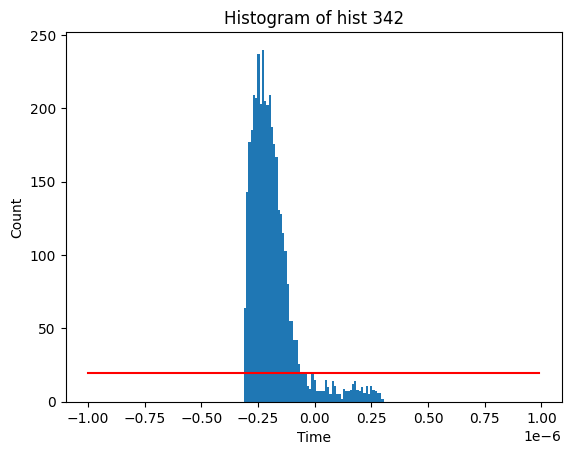

Fitted parameters: [ 3.70857364e+05 -7.43913687e+02  2.38867613e+02]
Covariance matrix: [[ 1.03175094e+23 -1.01920340e+19 -1.53200605e+17]
 [-1.01920340e+19  1.56173615e+16 -4.67625457e+15]
 [-1.53200605e+17 -4.67625457e+15  1.50661292e+15]]
Chisquare: 34317.604529962075
P-value: 0.0
197
Chisquare reduced: 174.20103822315775


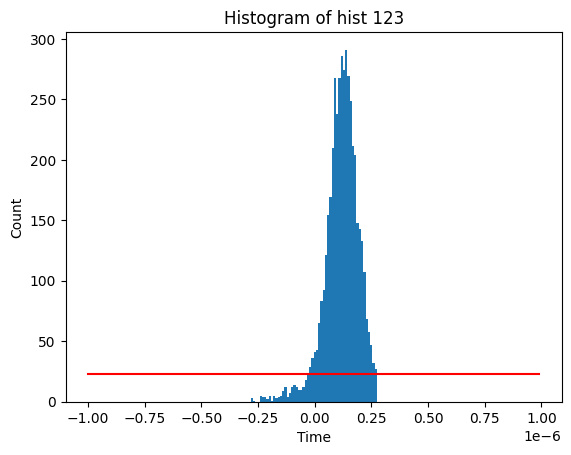

Fitted parameters: [214.63272787   1.95565235  -1.30540378]
Covariance matrix: [[ 4.08930985e+16  1.66197044e+14 -5.53536246e+13]
 [ 1.66197044e+14  6.75938263e+11 -2.25289753e+11]
 [-5.53536246e+13 -2.25289753e+11  7.51429470e+10]]
Chisquare: 11613.953301012538
P-value: 0.0
197
Chisquare reduced: 58.95407767011441


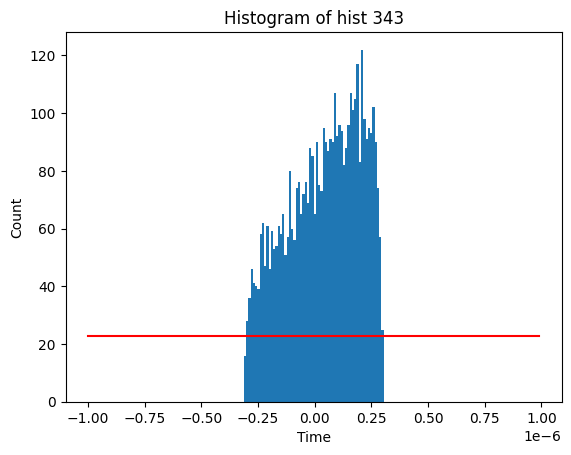

In [11]:




# Define gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) / c) ** 2)

hist=[12_1,34_1,12_2,34_2,12_3,34_3]
counts=np.stack([freq12_1,freq34_1,freq12_2,freq34_2,freq12_3,freq34_3],axis=0)
times=np.stack([bins12_1[:-1],bins34_1[:-1],bins12_2[:-1],bins34_2[:-1],bins12_3[:-1],bins34_3[:-1] ],axis=0)

print(np.shape(counts))

p0_list=[(120,0,0.3318),(120, 0 , 3.03266025),(128, 9.02490361,  2.91871235),(140, -2.4,  2.88231386),(97,9.36570895, 2.84337087),(100, 2.03798281, 2.89832761)]

s=[]
ds=[]
T=[]
dT=[]

for i in range(6):
    
    if i<=3:
        sigma1=[np.var(counts[i,:])/30]*200
    else:
        sigma1=[np.sqrt(np.mean(counts[i,:]))]*200
    
    # Fit gaussian function with curve_fit
    # Use bounds to fix b to 0 and let a and c vary
    popt, pcov = curve_fit(gaussian, times[i,:], counts[i,:],p0=p0_list[i],sigma=sigma1,absolute_sigma=True)
    
    # Print fitted parameters and covariance matrix
    print("Fitted parameters:", popt)
    print("Covariance matrix:", pcov)
    s=np.append(s,popt[2])
    T=np.append(T,popt[1])
    ds=np.append(ds,np.sqrt(pcov[2,2]))
    dT=np.append(dT,np.sqrt(pcov[1,1]))
    # Plot histogram and fitted function
    plt.hist(times[i,:], weights=counts[i,:], bins=200,)
    plt.xlabel("Time")
    plt.ylabel("Count")
    plt.title(f"Histogram of hist {hist[i]}")
    
    x = np.linspace(min(times[i,:]), max(times[i,:]), 1000)
    y = gaussian(x, *popt)
    plt.plot(x, y, 'r-', label="Fitted curve")
    '''
    x_test = np.linspace(min(times[i,:]), max(times[i,:]), 1000)
    y_test = gaussian(x,1.75000000e+02,-0,2.15270818 )
    plt.plot(x_test, y_test, 'y-', label="Fitted curve")
    plt.legend()
    plt.show()
    '''
    
    
    # Calculate expected frequencies from fitted function
    expected = gaussian(times[i,:], *popt)
    # Scale expected frequencies by ratio of sums
    ratio = sum(counts[i,:]) / sum(expected)
    expected = expected * ratio
    
    
    # Calculate chisquare and p-value
    chisq, p = chisquare(counts[i,:], expected)
    
    
    
    # Print results
    print("Chisquare:", chisq)
    print("P-value:", p)
    
    # Calculate chisquare reduced
    
    dof= len(times[i,:]) - 3
    print(dof)
    chisq_red = chisq / dof
    print("Chisquare reduced:", chisq_red)
    plt.show()

Ricavo Posizioni

In [127]:
'''
popt0_34=(1.38102492e-1)
popt1_34=-3.04900987
 
popt0_12=1.26514012e-1
popt1_12=-2.86058244


position1_12=(T[0]-popt1_12)/popt0_12
position1_34=(T[1]-popt1_34)/popt0_34

position2_12=(T[2]-popt1_12)/popt0_12
position2_34=(T[3]-popt1_34)/popt0_34

position3_12=(T[4]-popt1_12)/popt0_12
position3_34=(T[5]-popt1_34)/popt0_34

print(position1_12)
print(position1_34)
print(position2_12)
print(position2_34)
print(position3_12)
print(position3_34)

'''

'\npopt0_34=(1.38102492e-1)\npopt1_34=-3.04900987\n \npopt0_12=1.26514012e-1\npopt1_12=-2.86058244\n\n\nposition1_12=(T[0]-popt1_12)/popt0_12\nposition1_34=(T[1]-popt1_34)/popt0_34\n\nposition2_12=(T[2]-popt1_12)/popt0_12\nposition2_34=(T[3]-popt1_34)/popt0_34\n\nposition3_12=(T[4]-popt1_12)/popt0_12\nposition3_34=(T[5]-popt1_34)/popt0_34\n\nprint(position1_12)\nprint(position1_34)\nprint(position2_12)\nprint(position2_34)\nprint(position3_12)\nprint(position3_34)\n\n'

In [128]:
T=T*1e-7

In [129]:
popt0_34=1/6.90512457e-09
popt1_34=-1.07549696e-11
popt0_12=1/6.32570033e-09 
popt1_12=-7.72742902e-11
 


position1_34=(popt0_34/2)*(T[1]-popt1_34)+22
position1_12=(popt0_12/2)*(T[0]-popt1_12)+22


position2_34=(popt0_34/2)*(T[3]-popt1_34)+22
position2_12=(popt0_12/2)*(T[2]-popt1_12)+22


position3_34=(popt0_34/2)*(T[5]-popt1_34)+22
position3_12=(popt0_12/2)*(T[4]-popt1_12)+22


print(position1_34)
print(position1_12)

print(position2_34)
print(position2_12)

print(position3_34)
print(position3_12)


21.808067440011328
17.630184605699803
6.344639906754944
5.784645211703033
26.509253575658025
32.05664161856021


In [130]:
x=np.linspace(0,100,100)

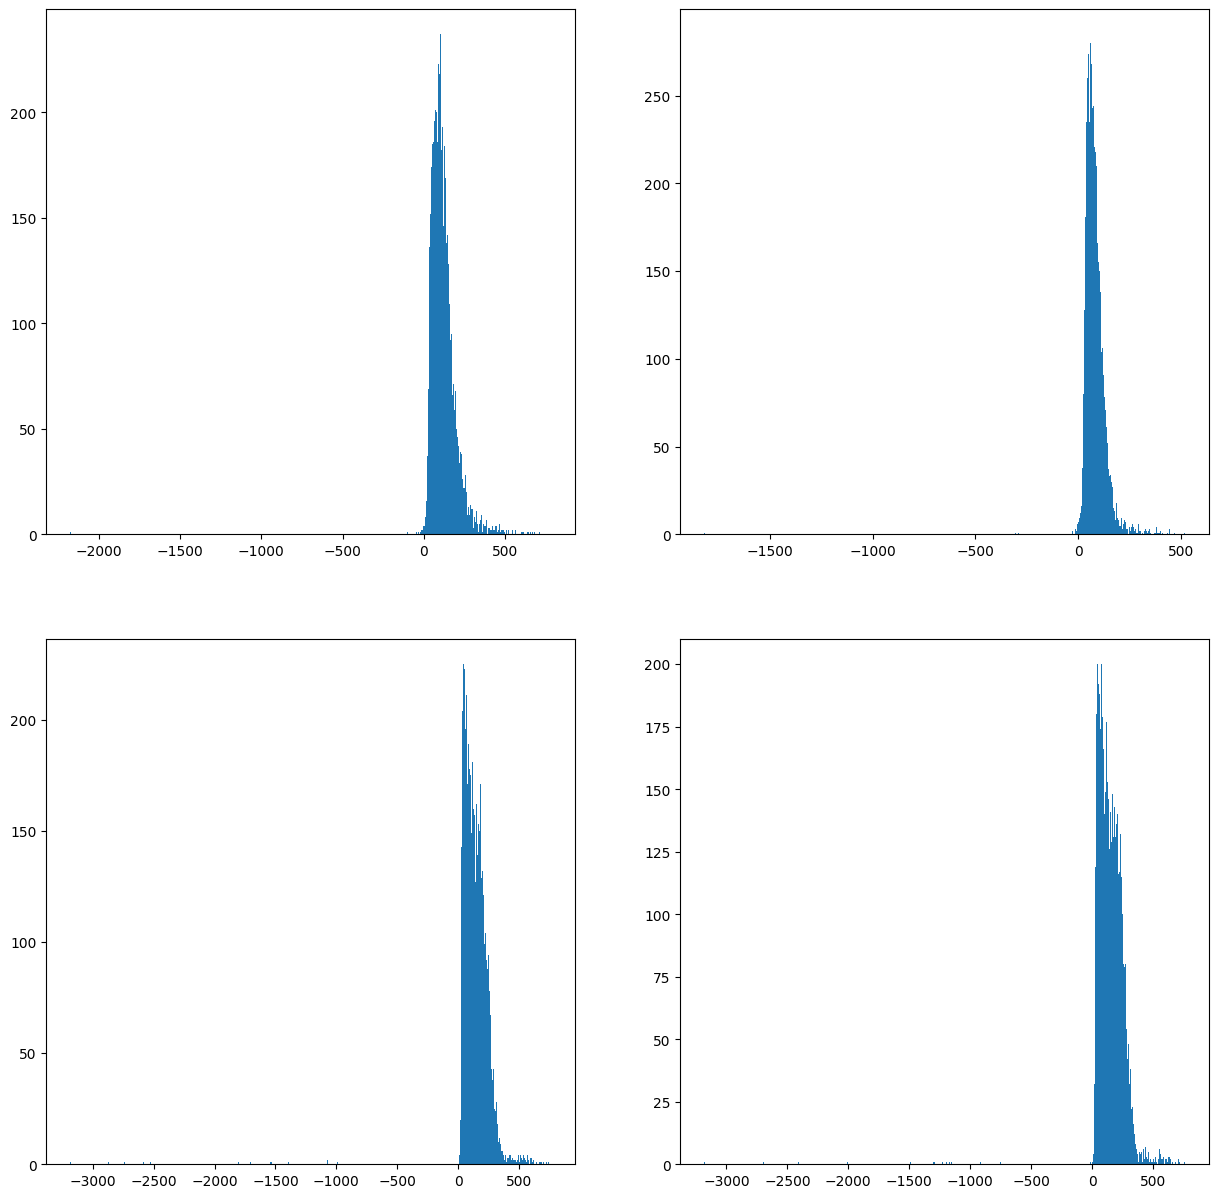

In [131]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
ax[0,0].hist(a1_1,bins=500)
ax[0,1].hist(a2_1,bins=500)
ax[1,0].hist(a3_1,bins=500)
ax[1,1].hist(a4_1,bins=500)

plt.show()

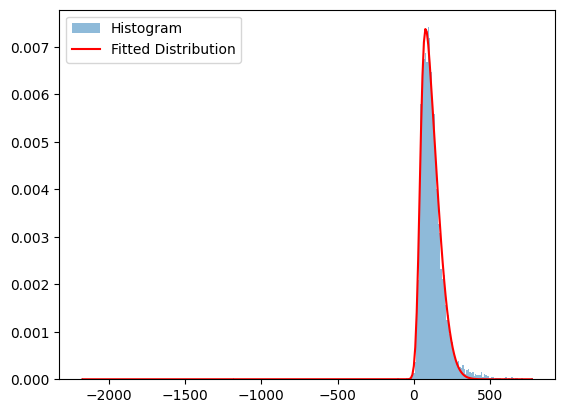

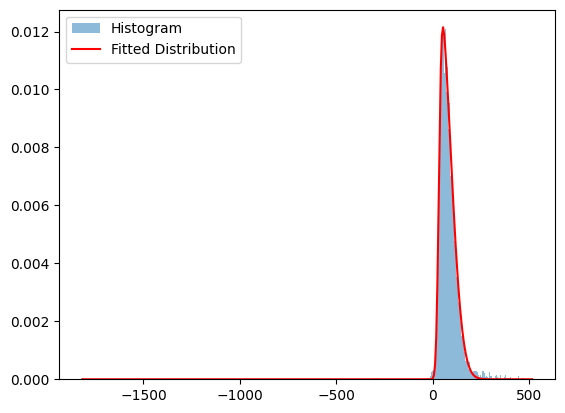

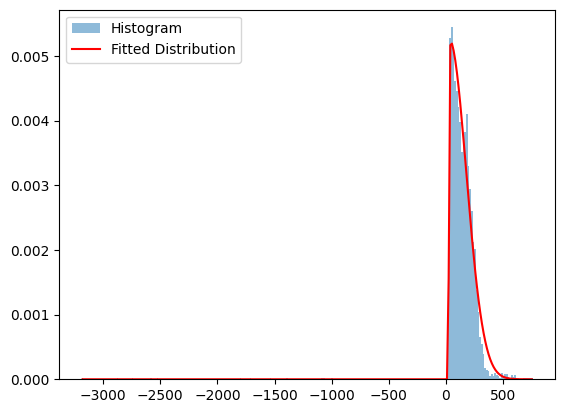

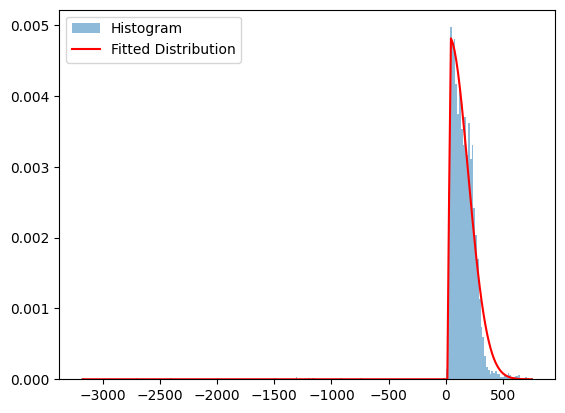

Fitted parameters for dataset 1: [39.72006456 95.45942078  4.30883715]
Median of the fitted distribution for dataset 1: 105.325
Fitted parameters for dataset 2: [31.97855311 59.88436359  5.3437284 ]
Median of the fitted distribution for dataset 2: 72.89099999999999
Fitted parameters for dataset 3: [ 26.13438488 151.50416898  27.80374361]
Median of the fitted distribution for dataset 3: 130.005
Fitted parameters for dataset 4: [2.82658807e+01 1.65076546e+02 2.72226667e+05]
Median of the fitted distribution for dataset 4: 140.801


In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data=np.array([a1_1,a2_1,a3_1,a4_1])
# Create an array to store the fitted distribution parameters
fitted_params = []

def skewed_distribution(x, mu, sigma, alpha):
    return stats.skewnorm.pdf(x, alpha, loc=mu, scale=sigma)

# Create an array to store the fitted distribution parameters
fitted_params = []
fitted_medians = []
# Iterate over each dataset
for dataset in data:
    # Generate the histogram using numpy.histogram
    hist, bin_edges = np.histogram(dataset, bins='auto', density=True)
    
    # Generate the corresponding x-values based on the histogram bin edges
    x = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit the skewed distribution to the histogram data using curve_fit
    initial_guess = [np.mean(dataset), np.std(dataset), 1]  # Initial parameter guess
    params, _ = curve_fit(skewed_distribution, x, hist, p0=initial_guess)
    fitted_params.append(params)
    
    # Generate the fitted distribution using the fitted parameters
    fitted_distribution = skewed_distribution(x, *params)
    median = np.median(dataset)
    fitted_medians.append(median)
    
    # Plot the histogram and the fitted distribution
    plt.figure()
    plt.hist(dataset, bins='auto', density=True, alpha=0.5, label='Histogram')
    plt.plot(x, fitted_distribution, 'r-', label='Fitted Distribution')
    plt.legend()
    plt.show()

# Print the fitted parameters for each dataset
for i, (params, median) in enumerate(zip(fitted_params, fitted_medians)):
    print(f"Fitted parameters for dataset {i+1}: {params}")
    print(f"Median of the fitted distribution for dataset {i+1}: {median}")



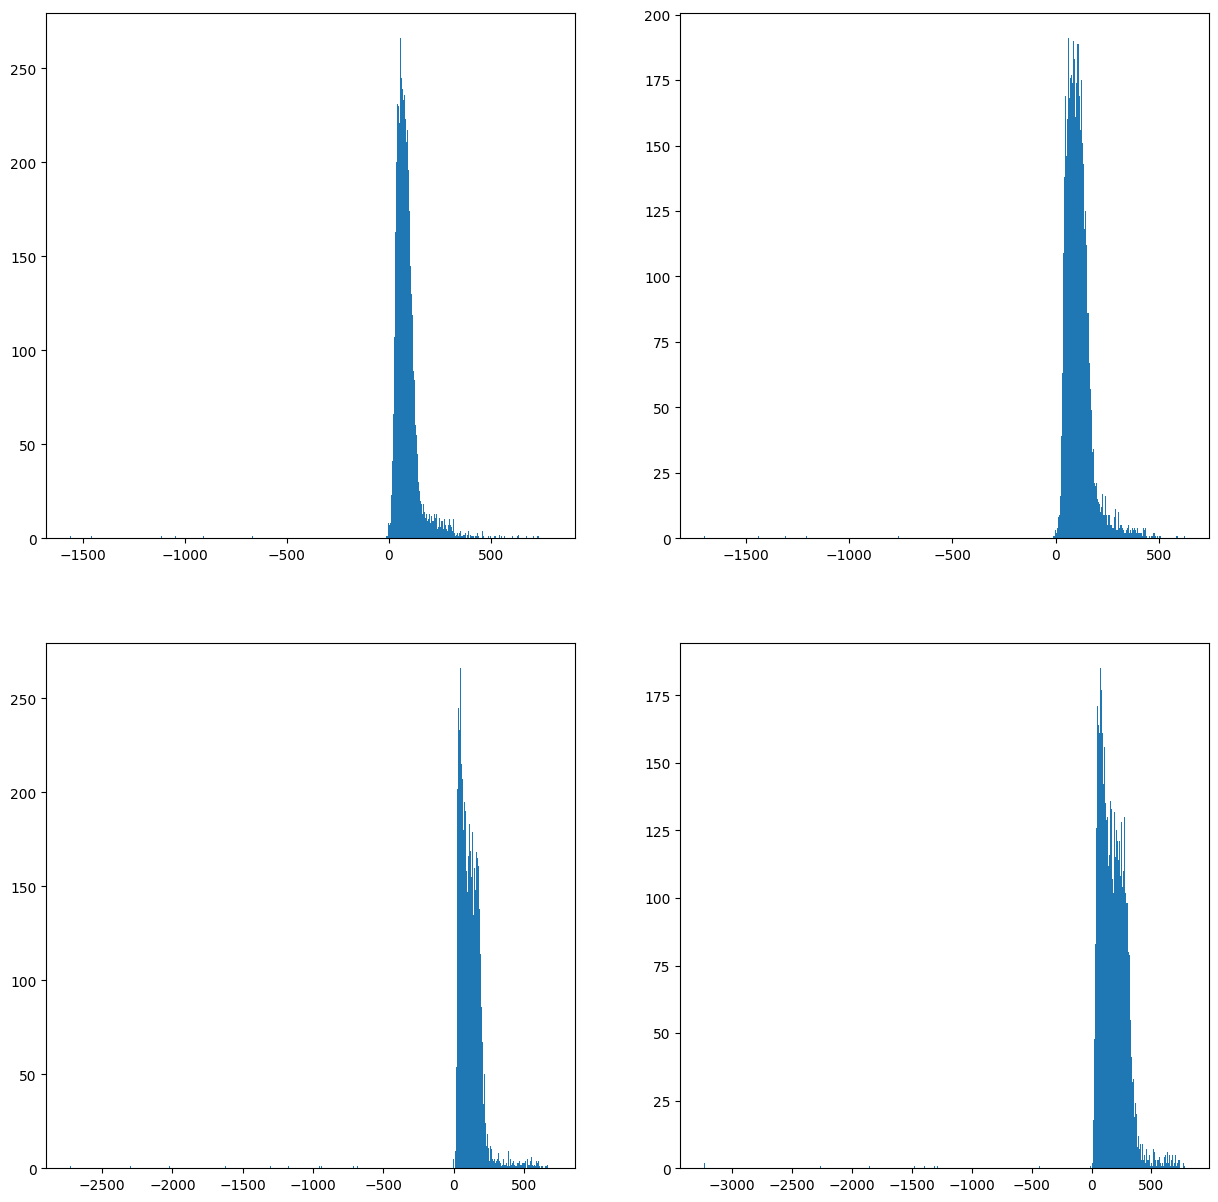

In [133]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
ax[0,0].hist(a1_2,bins=500)
ax[0,1].hist(a2_2,bins=500)
ax[1,0].hist(a3_2,bins=500)
ax[1,1].hist(a4_2,bins=500)
plt.show()

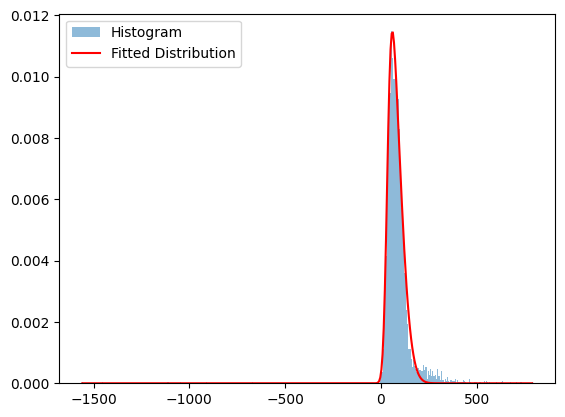

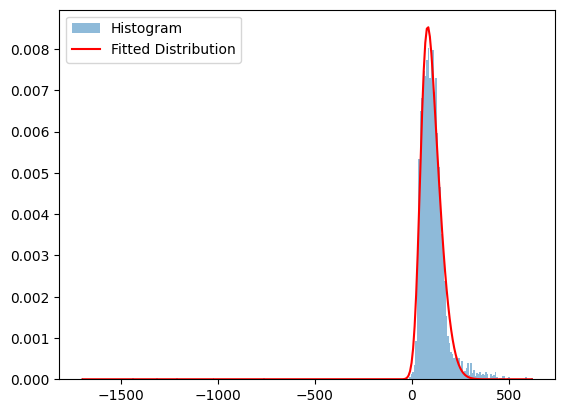

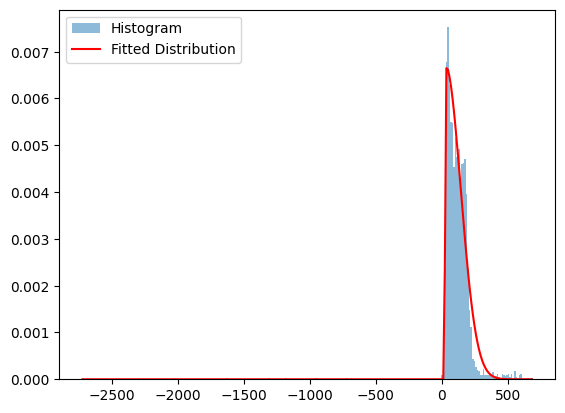

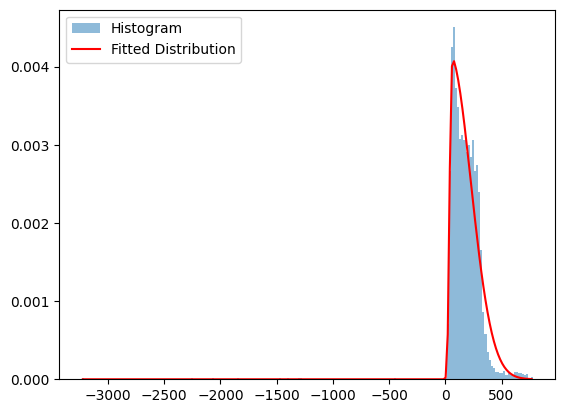

Fitted parameters for dataset 1: [32.97286604 58.90716365  3.41635641]
Median of the fitted distribution for dataset 1: 75.56649999999999
Fitted parameters for dataset 2: [45.09715211 75.46070111  2.75257153]
Median of the fitted distribution for dataset 2: 99.29400000000001
Fitted parameters for dataset 3: [ 24.80139422 118.51108709  27.77453978]
Median of the fitted distribution for dataset 3: 108.518
Fitted parameters for dataset 4: [ 35.44026711 191.32313198  15.03473646]
Median of the fitted distribution for dataset 4: 167.7945


In [134]:
data1=np.array([a1_2,a2_2,a3_2,a4_2])
# Create an array to store the fitted distribution parameters
fitted_params = []

def skewed_distribution(x, mu, sigma, alpha):
    return stats.skewnorm.pdf(x, alpha, loc=mu, scale=sigma)

# Create an array to store the fitted distribution parameters
fitted_params = []
fitted_medians = []
# Iterate over each dataset
for dataset in data1:
    # Generate the histogram using numpy.histogram
    hist, bin_edges = np.histogram(dataset, bins='auto', density=True)
    
    # Generate the corresponding x-values based on the histogram bin edges
    x = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit the skewed distribution to the histogram data using curve_fit
    initial_guess = [np.mean(dataset), np.std(dataset), 1]  # Initial parameter guess
    params, _ = curve_fit(skewed_distribution, x, hist, p0=initial_guess)
    fitted_params.append(params)
    
    # Generate the fitted distribution using the fitted parameters
    fitted_distribution = skewed_distribution(x, *params)
    median = np.median(dataset)
    fitted_medians.append(median)
    
    # Plot the histogram and the fitted distribution
    plt.figure()
    plt.hist(dataset, bins='auto', density=True, alpha=0.5, label='Histogram')
    plt.plot(x, fitted_distribution, 'r-', label='Fitted Distribution')
    plt.legend()
    plt.show()

# Print the fitted parameters for each dataset
for i, (params, median) in enumerate(zip(fitted_params, fitted_medians)):
    print(f"Fitted parameters for dataset {i+1}: {params}")
    print(f"Median of the fitted distribution for dataset {i+1}: {median}")



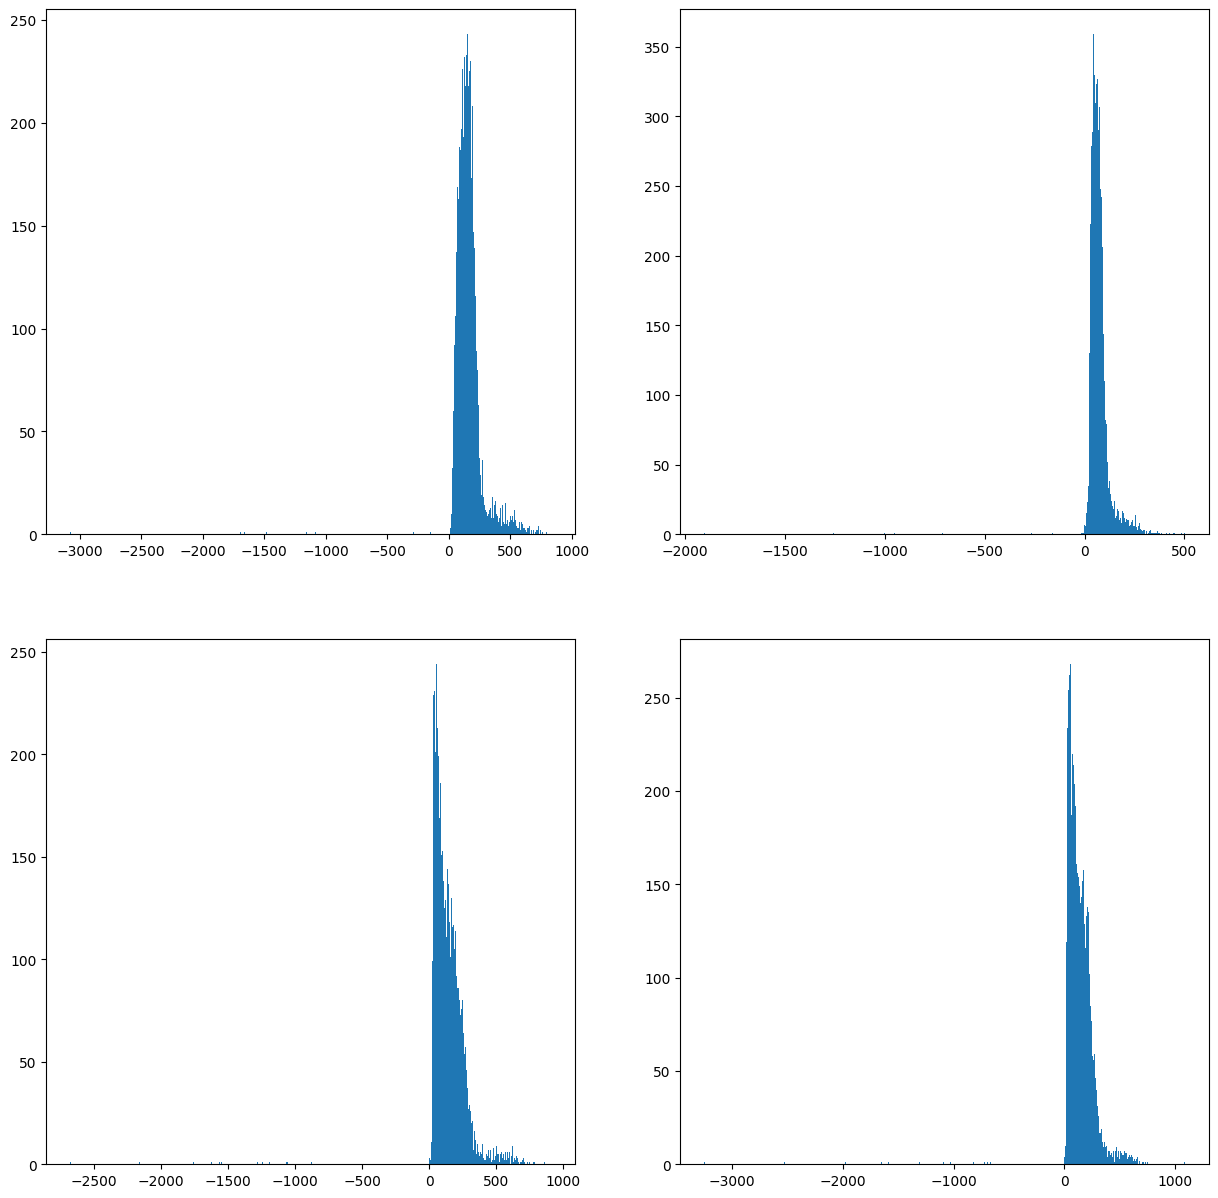

In [135]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
ax[0,0].hist(a1_3,bins=500)
ax[0,1].hist(a2_3,bins=500)
ax[1,0].hist(a3_3,bins=500)
ax[1,1].hist(a4_3,bins=500)
plt.show()  

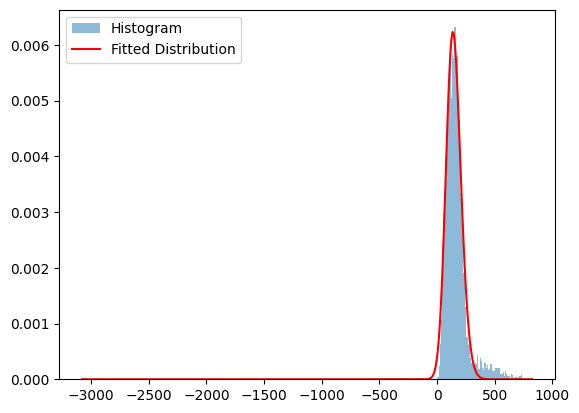

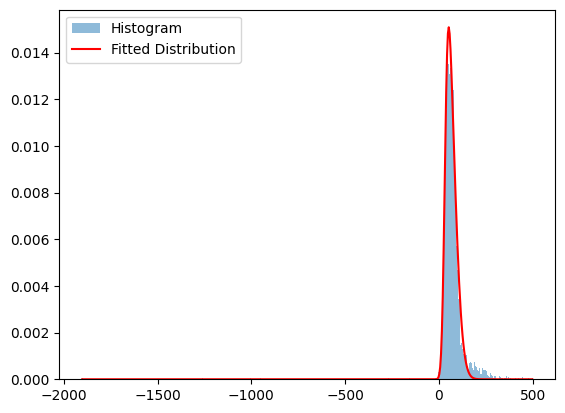

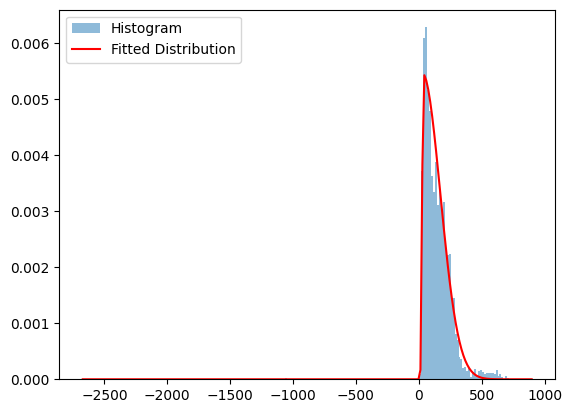

Fitted parameters for dataset 1: [92.42793676 83.76351026  1.29495528]
Median of the fitted distribution for dataset 1: 149.55200000000002
Fitted parameters for dataset 2: [32.36629813 44.25226173  3.20563689]
Median of the fitted distribution for dataset 2: 64.287
Fitted parameters for dataset 3: [ 24.82100729 145.66590087  22.42653086]
Median of the fitted distribution for dataset 3: 124.107


In [136]:
data2=np.array([a1_3,a2_3,a3_3])
# Create an array to store the fitted distribution parameters

def skewed_distribution(x, mu, sigma, alpha):
    return stats.skewnorm.pdf(x, alpha, loc=mu, scale=sigma)

# Create an array to store the fitted distribution parameters
fitted_params = []
fitted_medians = []
# Iterate over each dataset
for dataset in data2:
    # Generate the histogram using numpy.histogram
    hist, bin_edges = np.histogram(dataset, bins='auto', density=True)
    
    # Generate the corresponding x-values based on the histogram bin edges
    x = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit the skewed distribution to the histogram data using curve_fit
    initial_guess = [np.mean(dataset), np.std(dataset), 1]  # Initial parameter guess
    params, _ = curve_fit(skewed_distribution, x, hist, p0=initial_guess)
    fitted_params.append(params)
    
    # Generate the fitted distribution using the fitted parameters
    fitted_distribution = skewed_distribution(x, *params)
    median = np.median(dataset)
    fitted_medians.append(median)
    
    # Plot the histogram and the fitted distribution
    plt.figure()
    plt.hist(dataset, bins='auto', density=True, alpha=0.5, label='Histogram')
    plt.plot(x, fitted_distribution, 'r-', label='Fitted Distribution')
    plt.legend()
    plt.show()

# Print the fitted parameters for each dataset
for i, (params, median) in enumerate(zip(fitted_params, fitted_medians)):
    print(f"Fitted parameters for dataset {i+1}: {params}")
    print(f"Median of the fitted distribution for dataset {i+1}: {median}")




        SOLO PER A4_3 perchè non funziona

/home/francesco/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


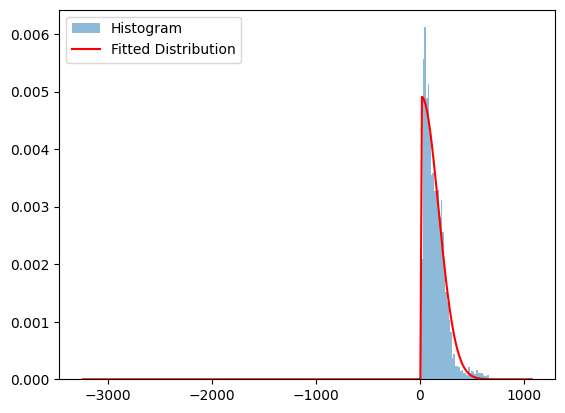

Fitted parameters for dataset 3: [  17.38781128  162.42932527 5000.        ]
Median of the fitted distribution for dataset 3: 123.4015


In [137]:

dataset=a4_3

fitted_medians = []
fitted_params = []
# Iterate over each dataset

# Generate the histogram using numpy.histogram
hist, bin_edges = np.histogram(dataset, bins='auto', density=True)

# Generate the corresponding x-values based on the histogram bin edges
x = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit the skewed distribution to the histogram data using curve_fit
initial_guess = [10, np.std(dataset), 5000]  # Initial parameter guess
params, _ = curve_fit(skewed_distribution, x, hist, p0=initial_guess)
fitted_params.append(params)

# Generate the fitted distribution using the fitted parameters
fitted_distribution = skewed_distribution(x, *params)
median = np.median(dataset)
fitted_medians.append(median)

# Plot the histogram and the fitted distribution
plt.figure()
plt.hist(dataset, bins='auto', density=True, alpha=0.5, label='Histogram')
plt.plot(x, fitted_distribution, 'r-', label='Fitted Distribution')
plt.legend()
plt.show()

print(f"Fitted parameters for dataset {i+1}: {params}")
print(f"Median of the fitted distribution for dataset {i+1}: {median}")
